In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import numpy as np
import os
plt.style.use('seaborn')


/tmp/ipykernel_17781/1318974711.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
log_runs_dir = '/home/beck/star-formation-ML/logs/eval/runs/'

# Listet den Inhalt des Predictions-Verzeichnisses auf
log_runs = os.listdir(log_runs_dir)

# Sortiert die Versionen nach Namen
sorted_runs = sorted(log_runs)

# Die neueste Version ist die letzte in der sortierten Liste
aktuelle_version = sorted_runs[-1]
letzte_version = sorted_runs[-2]

In [3]:
version_noise = letzte_version
version_no_noise = aktuelle_version

In [4]:
# load data

spectra = np.loadtxt('/home/beck/star-formation-ML/data/dataset_plusMass_smallRadius.txt')
labels = np.loadtxt('/home/beck/star-formation-ML/data/parameterset_plusMass_smallRadius.txt')

x_test = np.load('%s%s/x_test.npy' %(log_runs_dir, version_noise))
x_pred = np.load('%s%s/x_pred.npy' %(log_runs_dir, version_noise))
y_test = np.load('%s%s/y_test.npy' %(log_runs_dir, version_noise))
y_pred = np.load('%s%s/y_pred.npy' %(log_runs_dir, version_noise))

y_test_scaled  = np.load('%s%s/y_test_scaled.npy' %(log_runs_dir, version_noise))
y_pred_scaled  = np.load('%s%s/y_pred_scaled.npy' %(log_runs_dir, version_noise))

Frequency_array  = np.load('%s%s/Frequency_array.npy' %(log_runs_dir, version_noise))

NOISE  = np.load('%s%s/NOISE.npy' %(log_runs_dir, version_noise))

In [5]:
x_test_no_noise = np.load('%s%s/x_test_no_noise.npy' %(log_runs_dir, version_no_noise))
x_pred_no_noise = np.load('%s%s/x_pred_no_noise.npy' %(log_runs_dir, version_no_noise))
y_test_no_noise = np.load('%s%s/y_test_no_noise.npy' %(log_runs_dir, version_no_noise))
y_pred_no_noise = np.load('%s%s/y_pred_no_noise.npy' %(log_runs_dir, version_no_noise))

y_test_scaled_no_noise  = np.load('%s%s/y_test_scaled_no_noise.npy' %(log_runs_dir, version_no_noise))
y_pred_scaled_no_noise  = np.load('%s%s/y_pred_scaled_no_noise.npy' %(log_runs_dir, version_no_noise))

In [6]:
signal_to_noise = np.max(x_test_no_noise, axis=1)/np.abs(np.random.normal(0, scale=NOISE))
low_signal_to_noise = np.where(signal_to_noise <= 5)
high_signal_to_noise = np.where(signal_to_noise > 5)

## Extracting Parameters from the Predicted and Ground Truth Values

In [7]:
T_true_scaled = y_test_scaled[:, 0]
T_alpha_true_scaled = y_test_scaled[:, 1]
n_true_scaled = y_test_scaled[:, 2]
n_alpha_true_scaled = y_test_scaled[:, 3]
M_true_scaled = y_test_scaled[:, 4]

T_predicted_scaled = y_pred_scaled[:, 0]
T_alpha_predicted_scaled = y_pred_scaled[:, 1]
n_predicted_scaled = y_pred_scaled[:, 2]
n_alpha_predicted_scaled = y_pred_scaled[:, 3]
M_predicted_scaled = y_pred_scaled[:, 4]

T_true = y_test[:, 0]
T_alpha_true = y_test[:, 1]
n_true = y_test[:, 2]
n_alpha_true = y_test[:, 3]
M_true = y_test[:, 4]

T_predicted = y_pred[:, 0]
T_alpha_predicted = y_pred[:, 1]
n_predicted = y_pred[:, 2]
n_alpha_predicted = y_pred[:, 3]
M_predicted = y_pred[:, 4]

unique_values_T, unique_indices = np.unique(T_true, return_index=True)
unique_values_T_alpha, unique_indices = np.unique(T_alpha_true, return_index=True)
unique_values_n, unique_indices = np.unique(n_true, return_index=True)
unique_values_n_alpha, unique_indices = np.unique(n_alpha_true, return_index=True)
unique_values_T, unique_indices = np.unique(T_true, return_index=True)
unique_values_M, unique_indices = np.unique(M_true, return_index=True)

In [8]:
T_true_scaled_no_noise = y_test_scaled_no_noise[:, 0]
T_alpha_true_scaled_no_noise = y_test_scaled_no_noise[:, 1]
n_true_scaled_no_noise = y_test_scaled_no_noise[:, 2]
n_alpha_true_scaled_no_noise = y_test_scaled_no_noise[:, 3]
M_true_scaled_no_noise = y_test_scaled_no_noise[:, 4]

T_predicted_scaled_no_noise = y_pred_scaled_no_noise[:, 0]
T_alpha_predicted_scaled_no_noise = y_pred_scaled_no_noise[:, 1]
n_predicted_scaled_no_noise = y_pred_scaled_no_noise[:, 2]
n_alpha_predicted_scaled_no_noise = y_pred_scaled_no_noise[:, 3]
M_predicted_scaled_no_noise = y_pred_scaled_no_noise[:, 4]

T_true_no_noise = y_test_no_noise[:, 0]
T_alpha_true_no_noise = y_test_no_noise[:, 1]
n_true_no_noise = y_test_no_noise[:, 2]
n_alpha_true_no_noise = y_test_no_noise[:, 3]
M_true_no_noise = y_test_no_noise[:, 4]

T_predicted_no_noise = y_pred_no_noise[:, 0]
T_alpha_predicted_no_noise = y_pred_no_noise[:, 1]
n_predicted_no_noise = y_pred_no_noise[:, 2]
n_alpha_predicted_no_noise = y_pred_no_noise[:, 3]
M_predicted_no_noise = y_pred_no_noise[:, 4]

unique_values_T_no_noise, unique_indices = np.unique(T_true_no_noise, return_index=True)
unique_values_T_alpha_no_noise, unique_indices = np.unique(T_alpha_true_no_noise, return_index=True)
unique_values_n_no_noise, unique_indices = np.unique(n_true_no_noise, return_index=True)
unique_values_n_alpha_no_noise, unique_indices = np.unique(n_alpha_true_no_noise, return_index=True)
unique_values_T_no_noise, unique_indices = np.unique(T_true_no_noise, return_index=True)
unique_values_M_no_noise, unique_indices = np.unique(M_true_no_noise, return_index=True)

## Preparation of samples

In [9]:
x_axis = Frequency_array
original_spectrum = x_test_no_noise.reshape(int(len(x_test_no_noise)), 3, int(len(x_test_no_noise[0])/3))

y_axis_true = x_test.reshape(int(len(x_test)), 3, int(len(x_test[0])/3))
y_axis_predicted = x_pred.reshape(int(len(x_pred)), 3, int(len(x_pred[0])/3))

y_axis_true_no_noise = x_test_no_noise.reshape(int(len(x_test)), 3, int(len(x_test[0])/3))
y_axis_predicted_no_noise = x_pred_no_noise.reshape(int(len(x_pred)), 3, int(len(x_pred[0])/3))

# Größte Intensitätsunterschiede
error_spectra = np.mean(np.abs(x_test - x_pred), axis=1)
error_parameter = np.mean(np.abs(y_test_scaled - y_pred_scaled), axis=1)

# Größte Parameterunterschiede
number_samples = 10

# indices of the spectra in the samples 
indices_high_spectra_differences = np.argsort(error_spectra)[-number_samples:]
indices_low_spectra_differences = np.argsort(error_spectra)[:number_samples]
indices_high_parameter_differences = np.argsort(error_parameter)[-number_samples:]
indices_low_parameter_differences = np.argsort(error_parameter)[:number_samples]

# Zufällige Beispiele
indices_random = np.random.choice(len(y_axis_true), size=number_samples, replace=False)

## Plotting Figure: Comparison of True and Predicted Parameters and their Spectra along the Radiative Cut

/tmp/ipykernel_17781/3619210464.py:11: RuntimeWarning: divide by zero encountered in log10
  n_max = max(np.max(np.log10(n_true)), np.max(np.log10(n_predicted)), np.max(np.log10(n_true_no_noise)), np.max(np.log10(masked_array_n_inf)))


random
random
random
random


/tmp/ipykernel_17781/3619210464.py:78: RuntimeWarning: divide by zero encountered in log10
  ax2.scatter(np.log10(n_predicted_no_noise[index]), T_predicted_no_noise[index], color = 'orangered', alpha = 0.75)


random
random
random
random
random
random


/home/beck/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


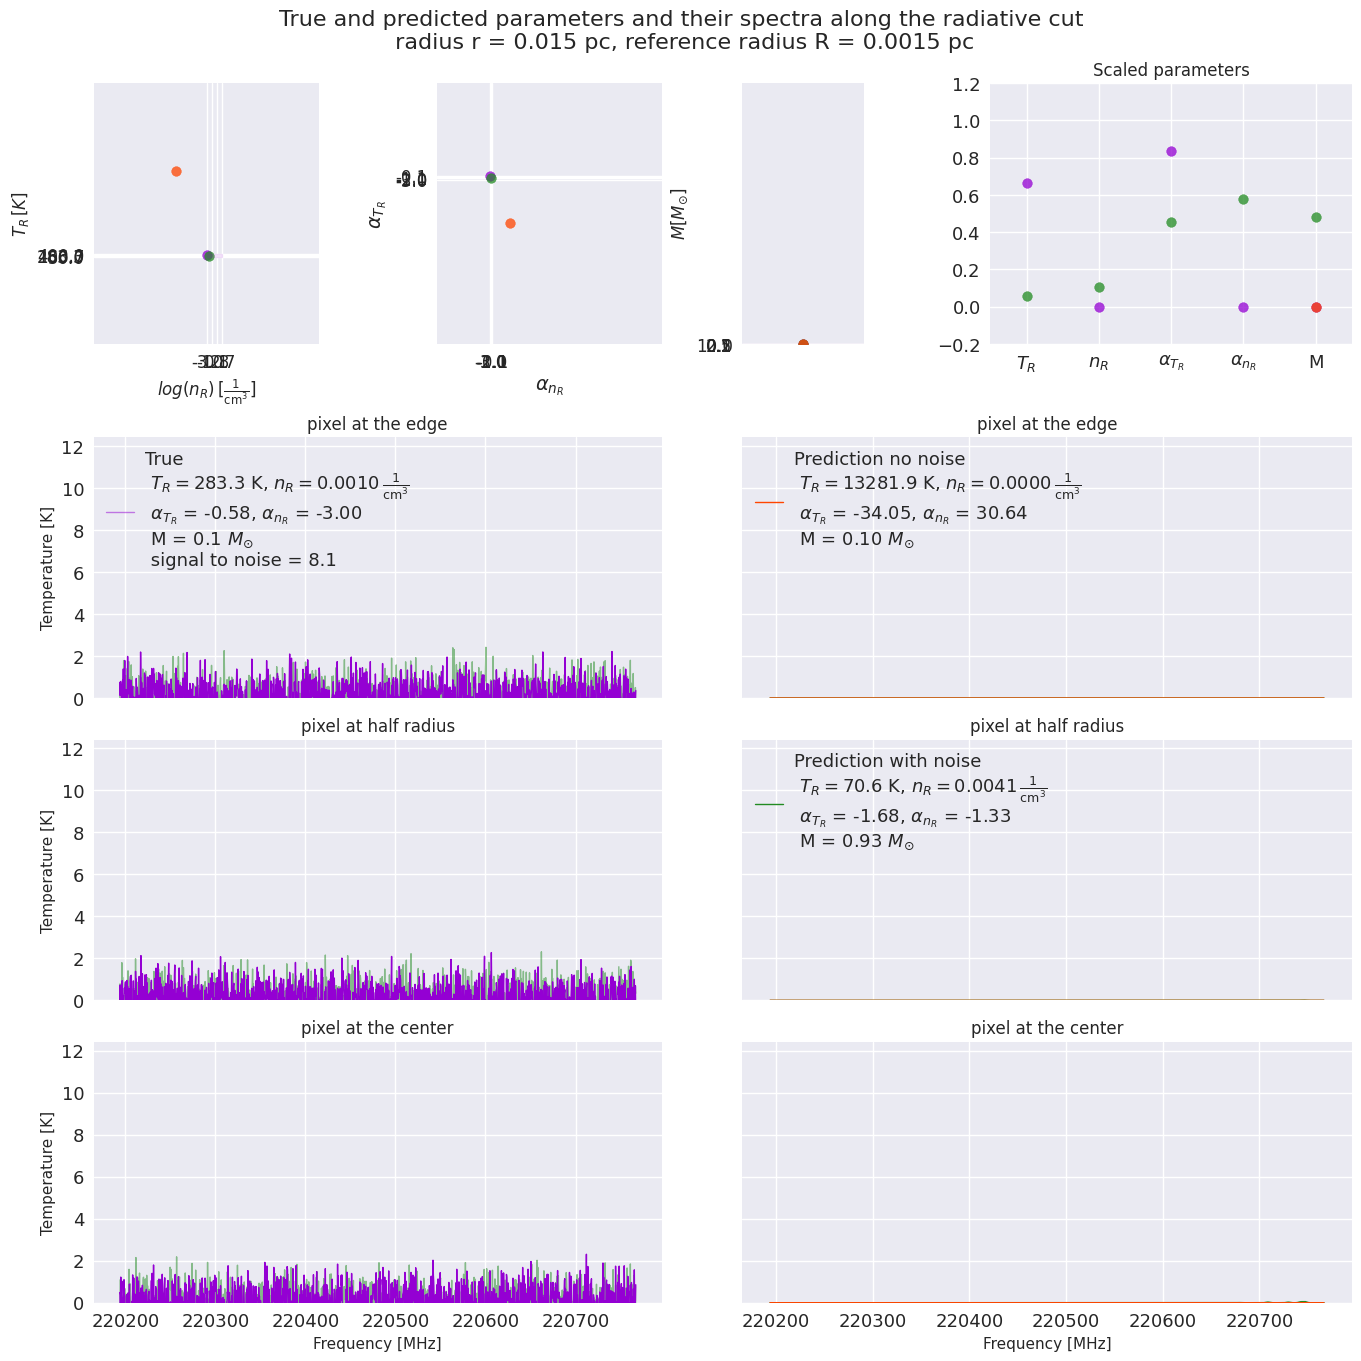

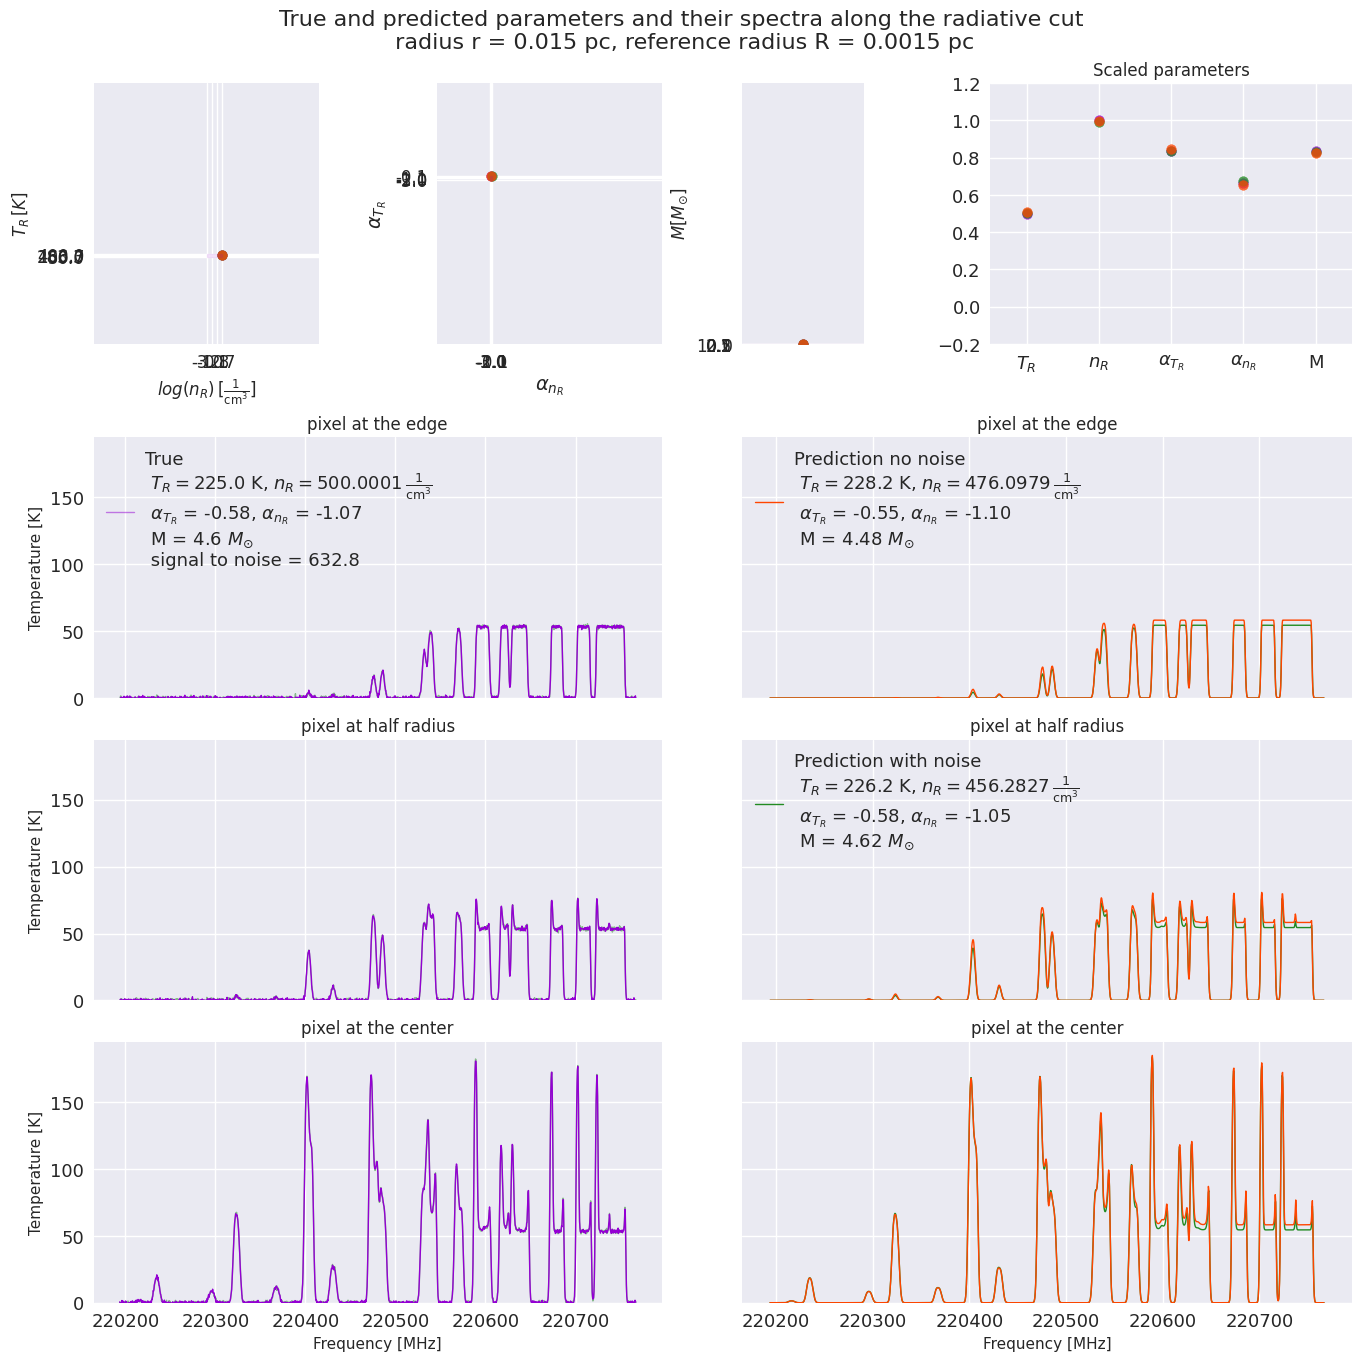

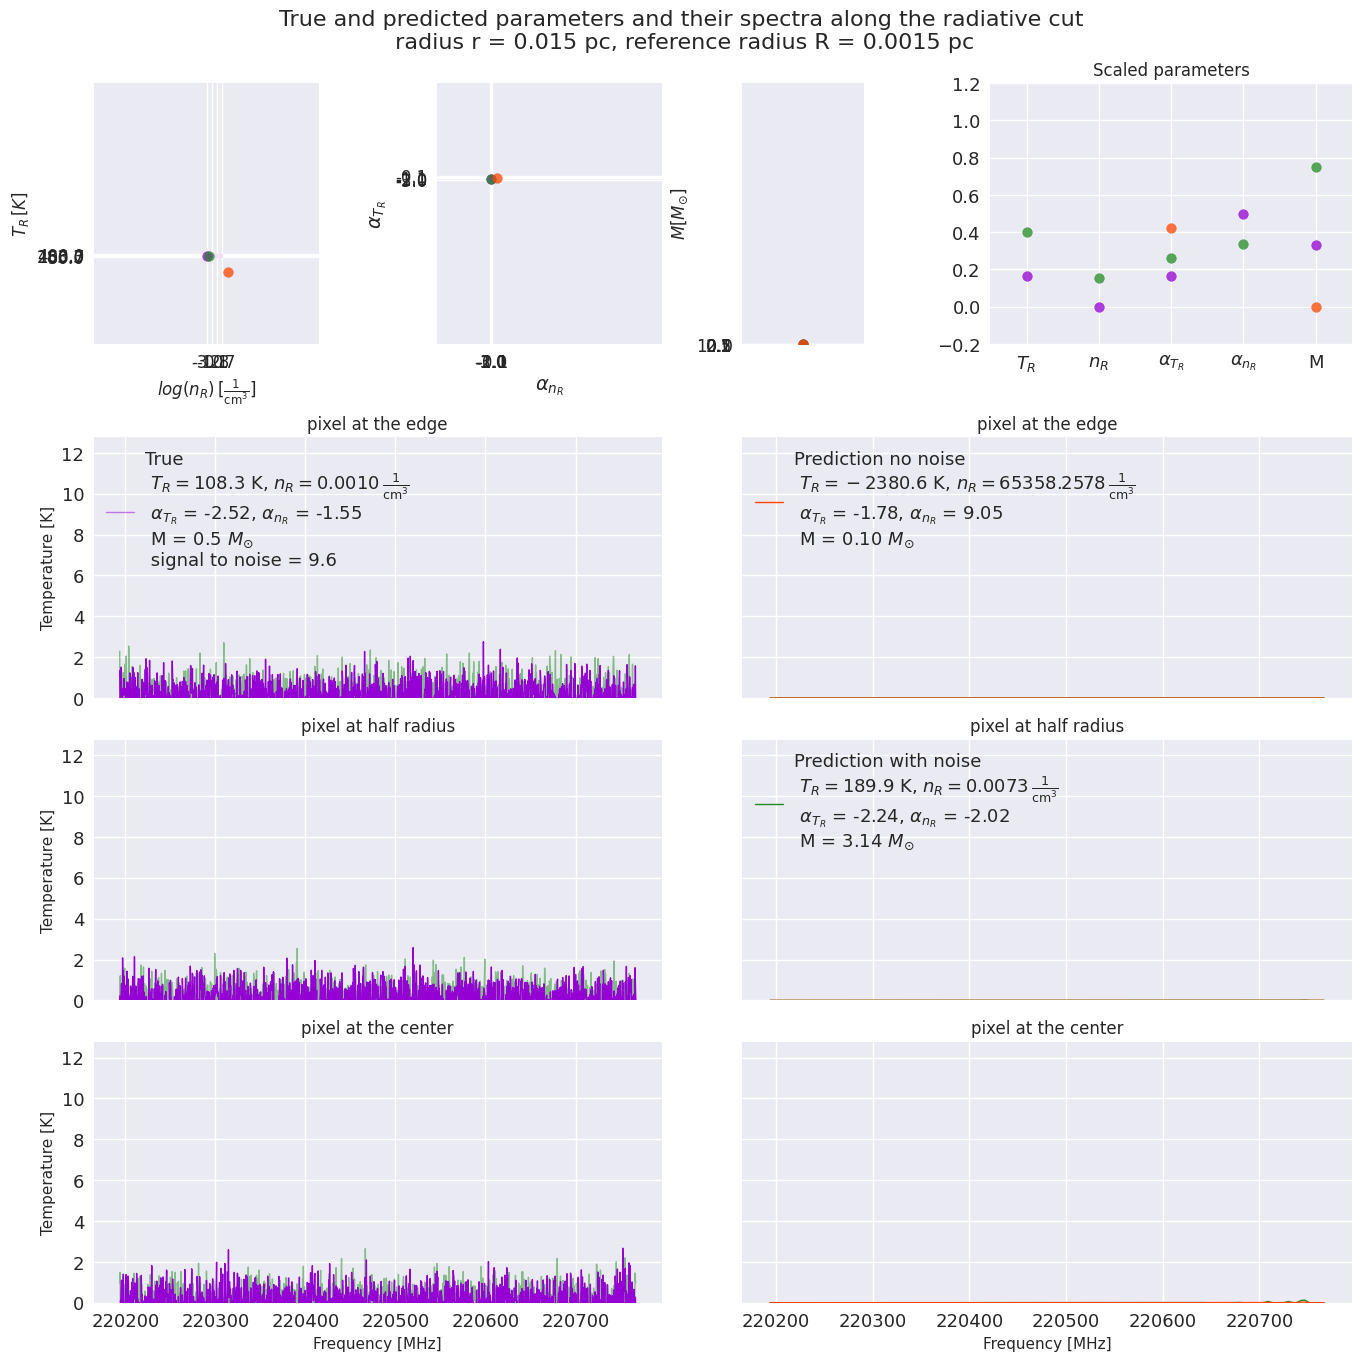

/home/beck/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


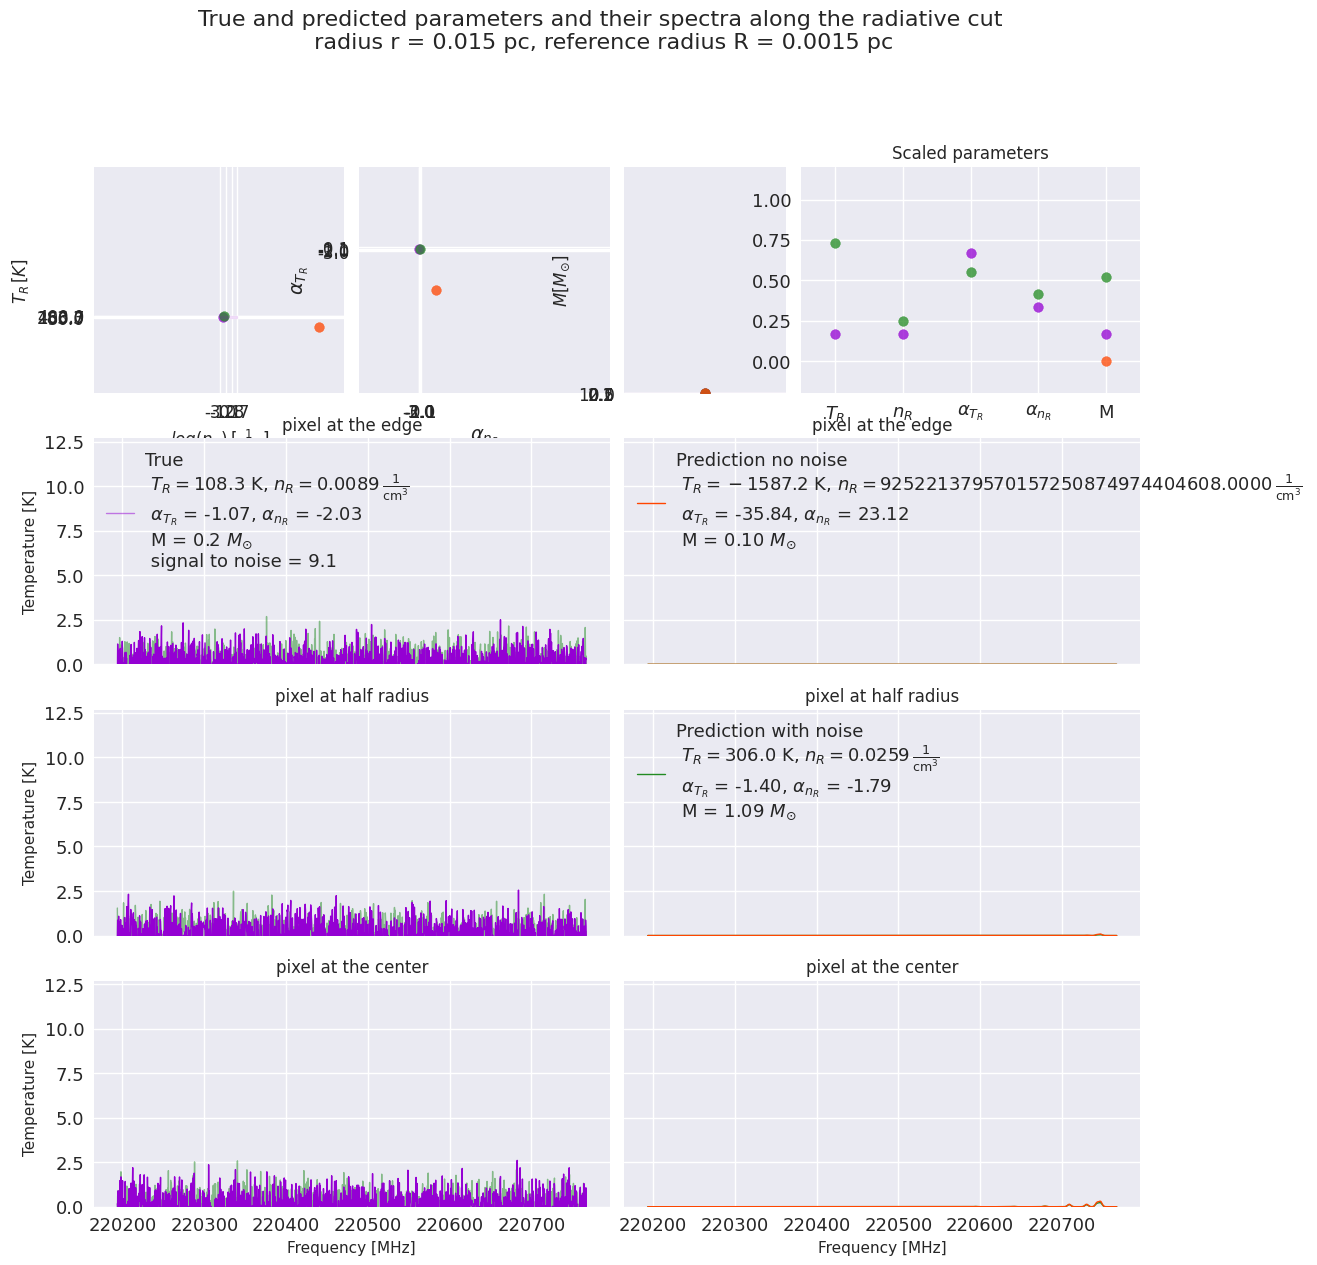

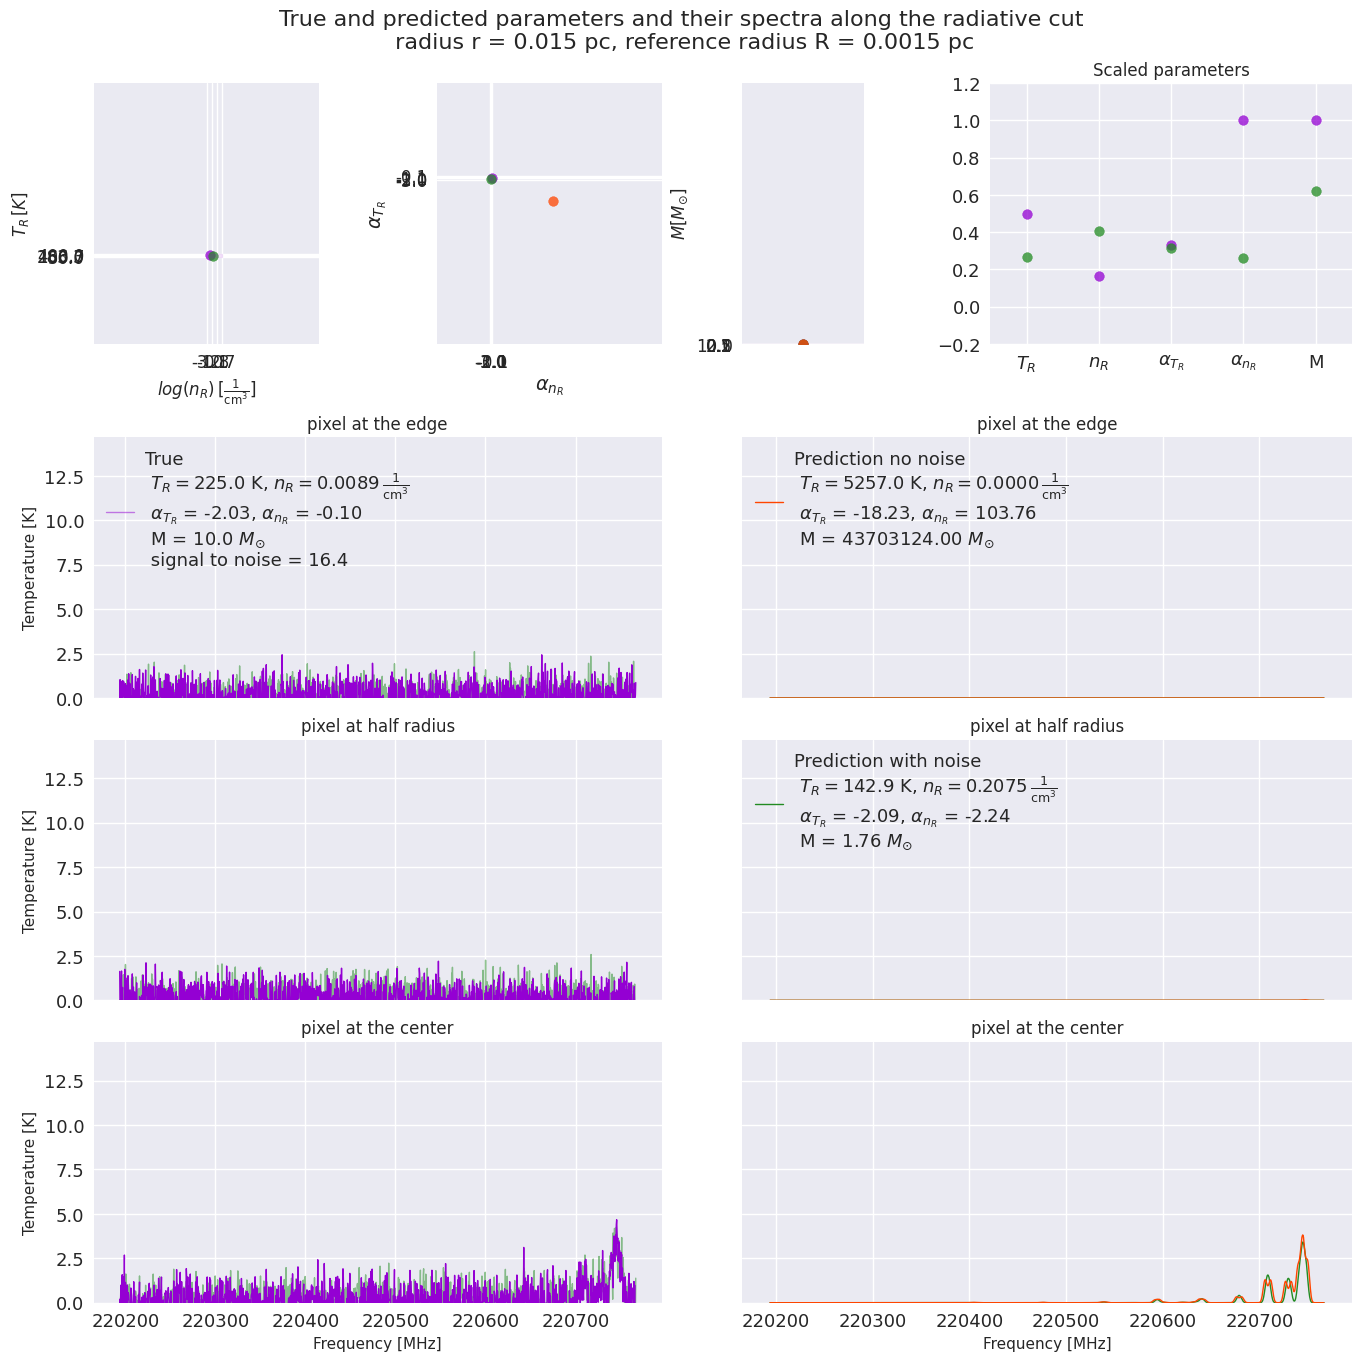

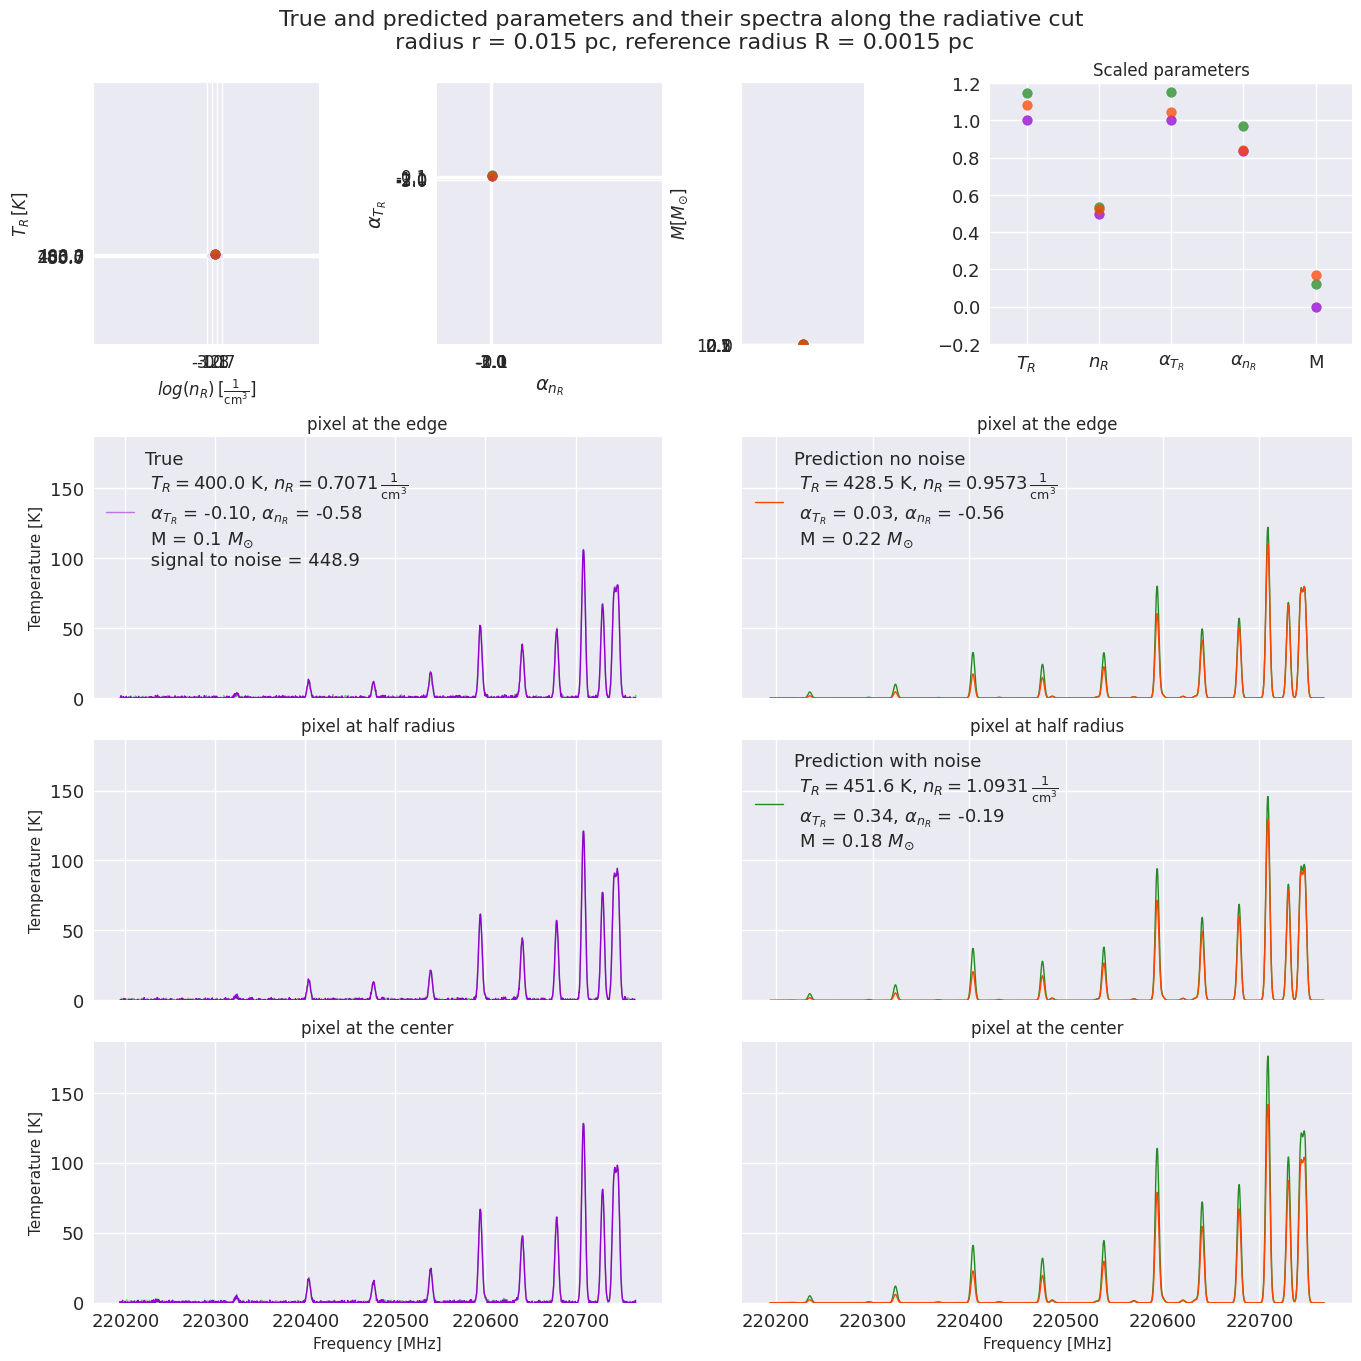

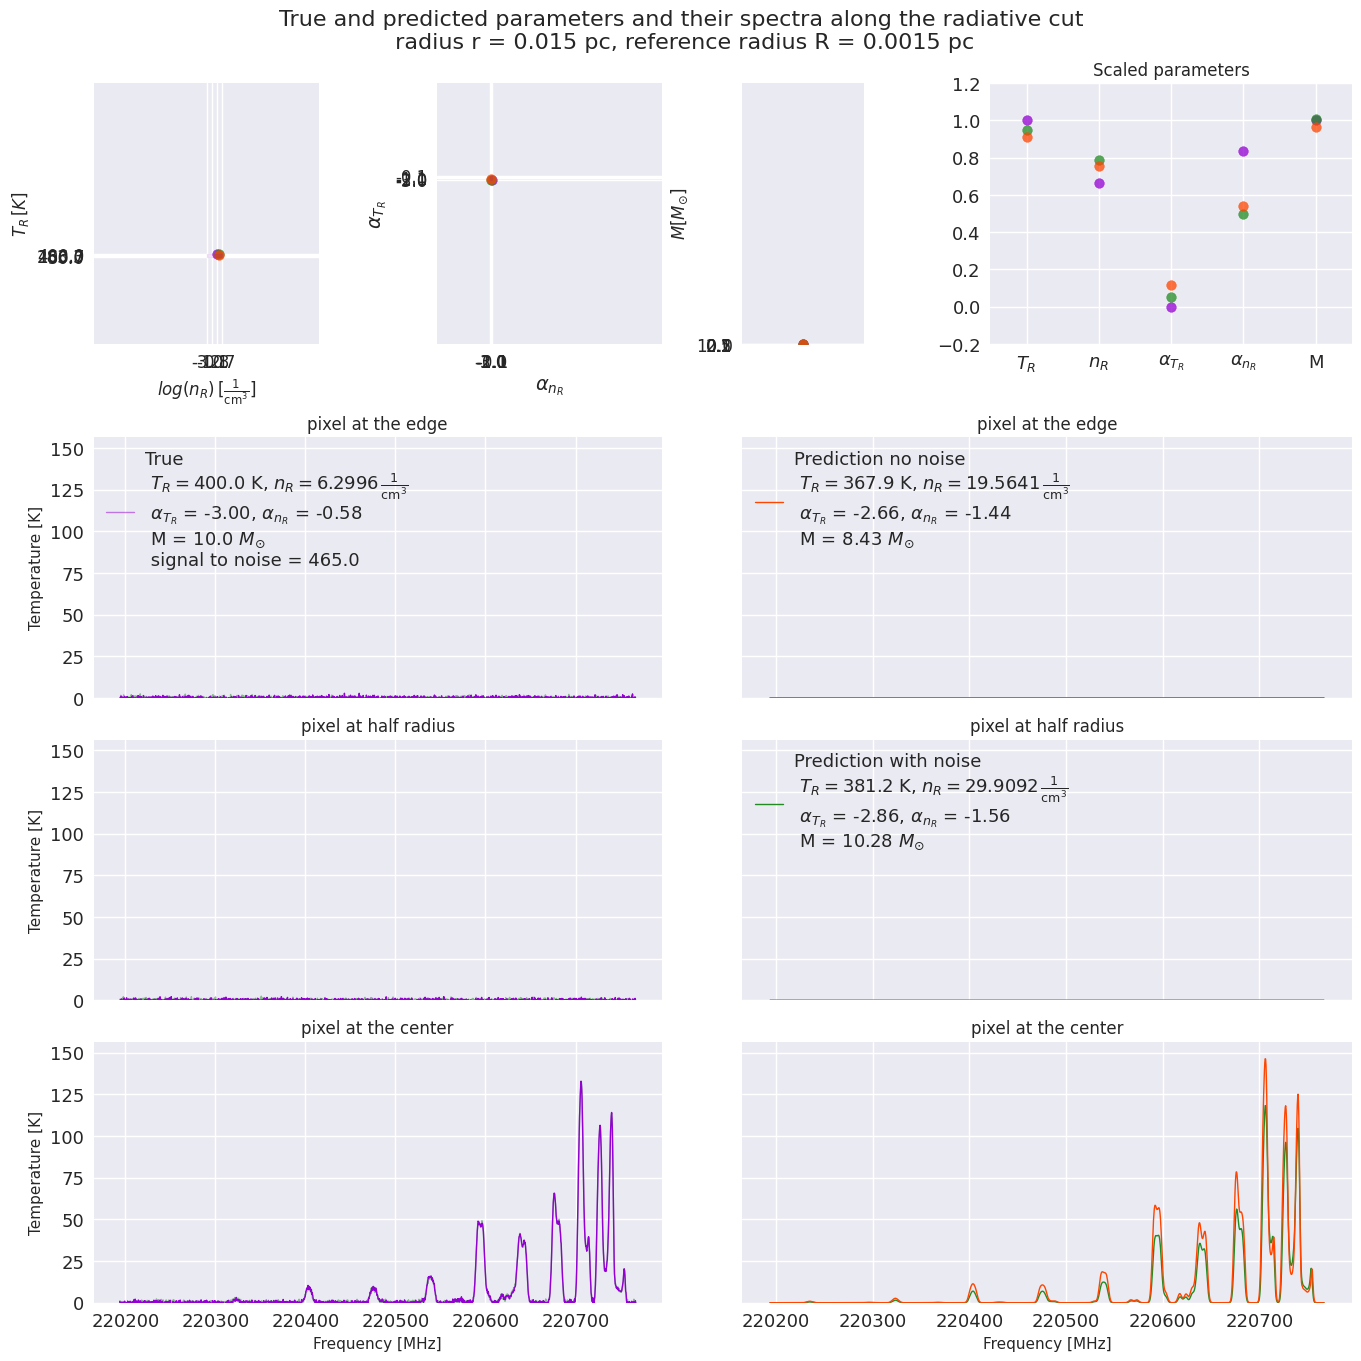

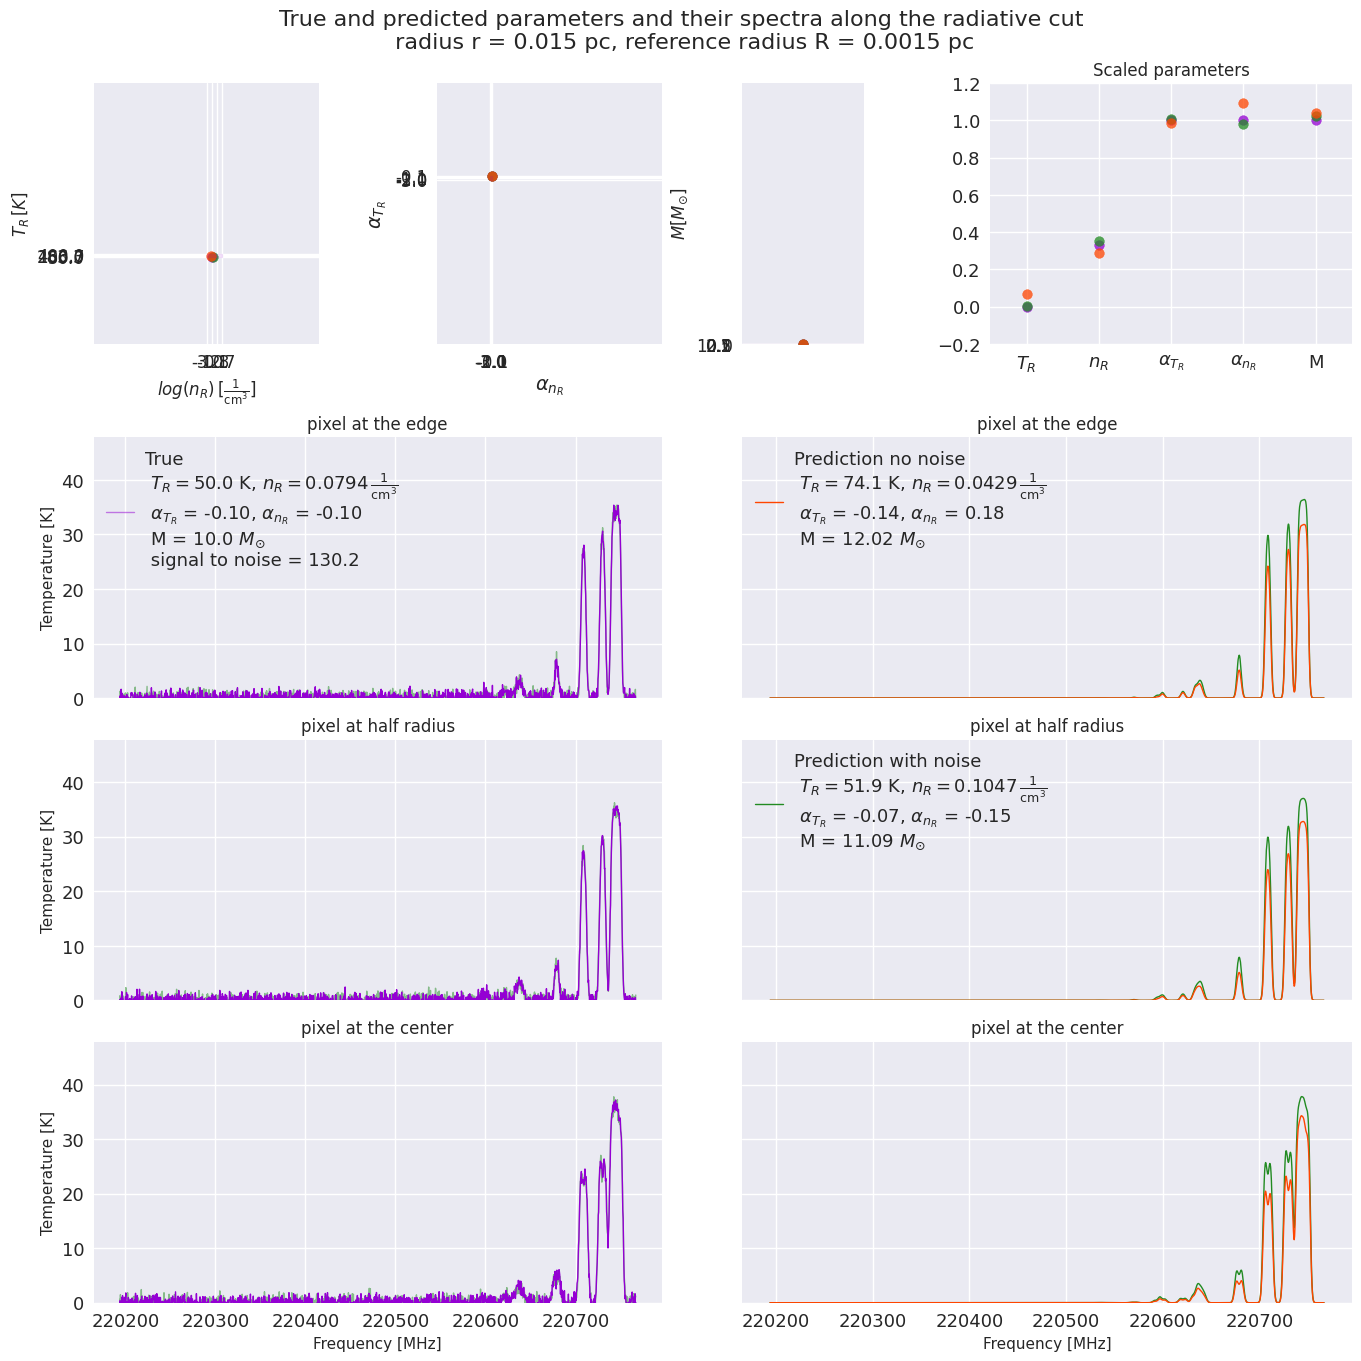

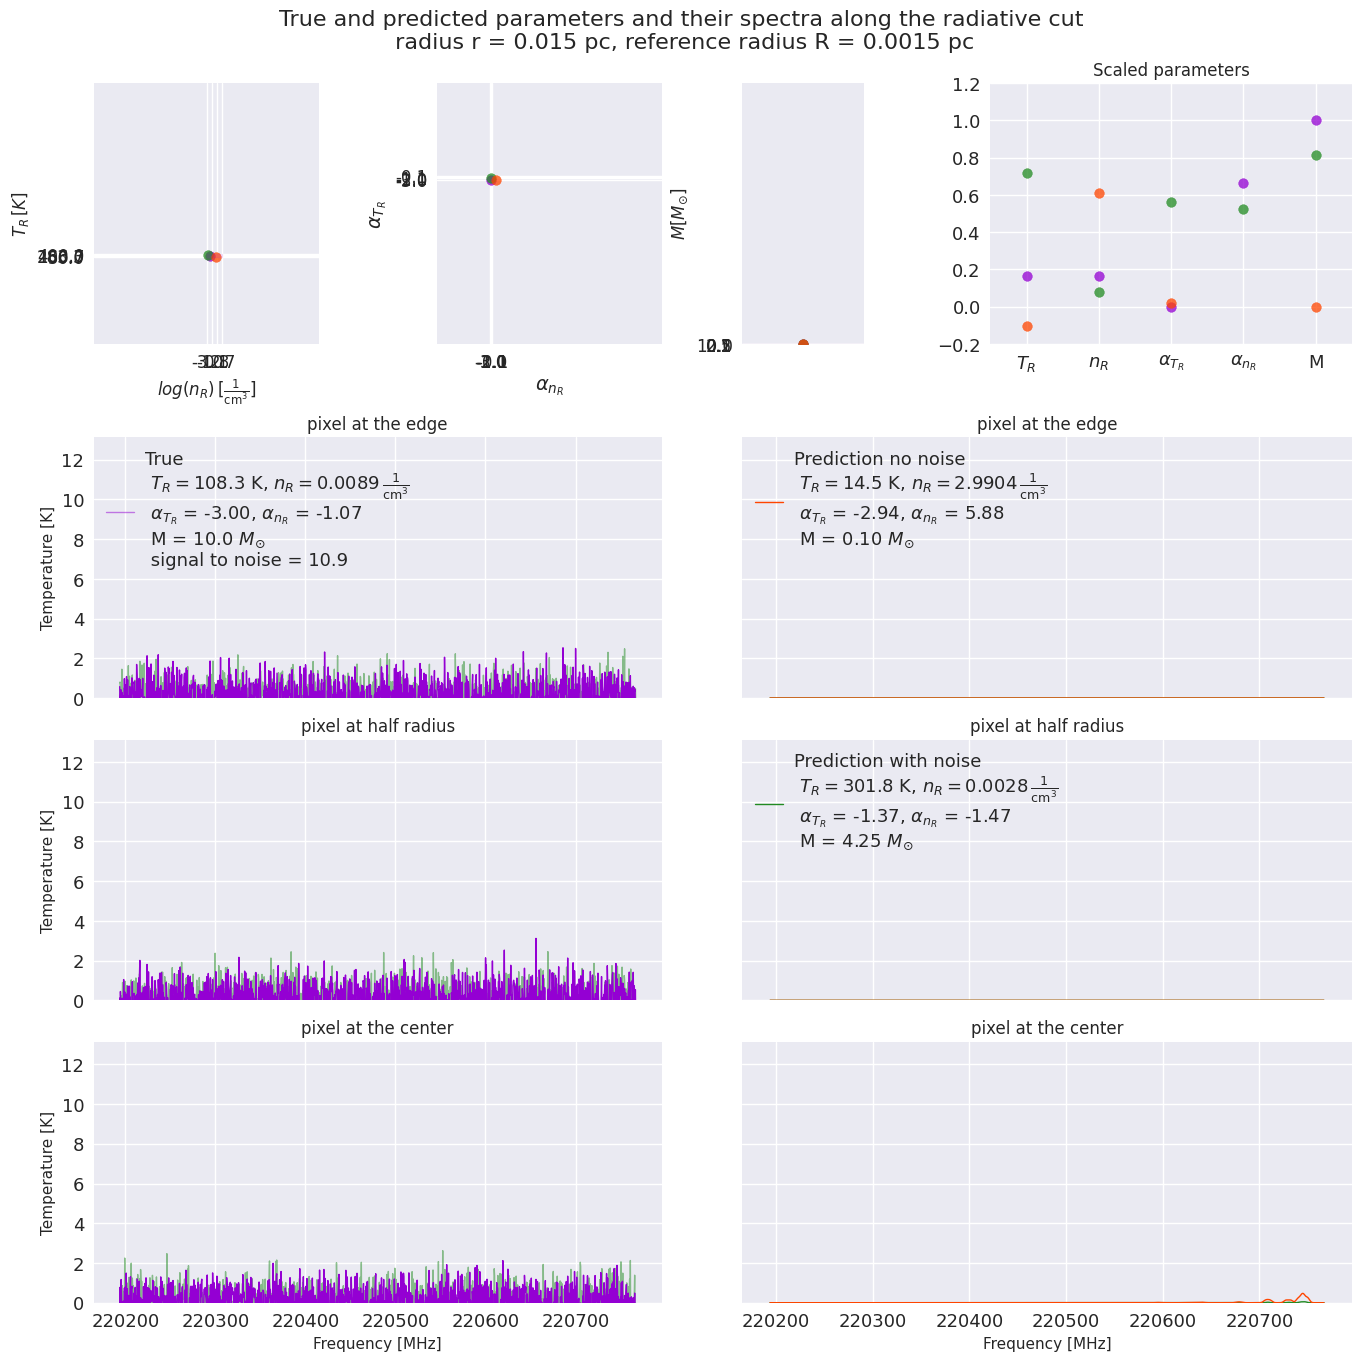

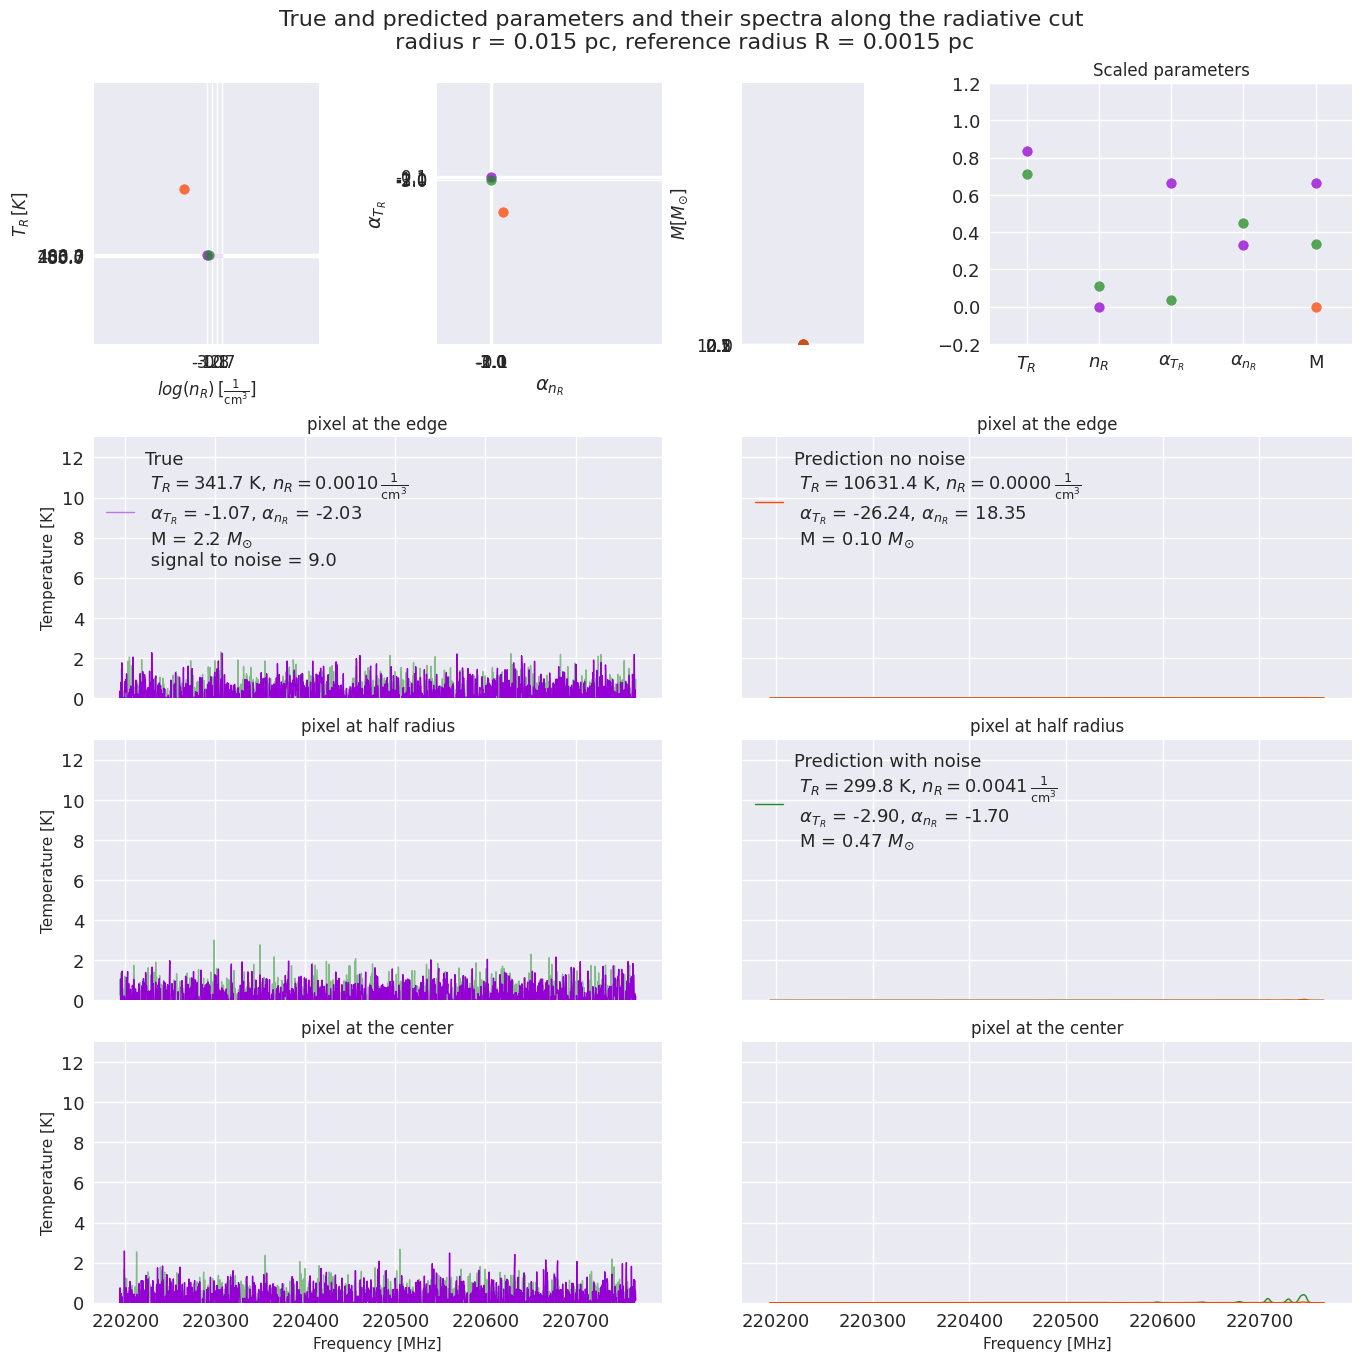

In [36]:
# minimal and maximal values of the total of the true and predicted parameters 
masked_array_M_inf = M_predicted_no_noise[~np.isinf(M_predicted_no_noise)]
zero_mask_n_0 = np.where(n_predicted_no_noise == 0, False, True)
masked_array_n_inf = n_predicted_no_noise[~np.isinf(n_predicted_no_noise)]

T_min = min(np.min(T_true), np.min(T_predicted), np.min(T_true_no_noise), np.min(T_predicted_no_noise))
T_max = max(np.max(T_true), np.max(T_predicted), np.max(T_true_no_noise), np.max(T_predicted_no_noise))
T_alpha_min = min(np.min(T_alpha_true), np.min(T_alpha_predicted), np.min(T_alpha_true_no_noise), np.min(T_alpha_predicted_no_noise))
T_alpha_max = max(np.max(T_alpha_true), np.max(T_alpha_predicted), np.max(T_alpha_true_no_noise), np.max(T_alpha_predicted_no_noise))
n_min = min(np.min(np.log10(n_true)), np.min(np.log10(n_predicted)), np.min(np.log10(n_true_no_noise)), np.min(np.log10(n_predicted_no_noise[zero_mask_n_0])))
n_max = max(np.max(np.log10(n_true)), np.max(np.log10(n_predicted)), np.max(np.log10(n_true_no_noise)), np.max(np.log10(masked_array_n_inf)))
n_alpha_min = min(np.max(n_alpha_true), np.min(n_alpha_predicted), np.max(n_alpha_true_no_noise), np.min(n_alpha_predicted_no_noise))
n_alpha_max = max(np.max(n_alpha_true), np.max(n_alpha_predicted), np.max(n_alpha_true_no_noise), np.max(n_alpha_predicted_no_noise))
M_min = min(np.min(M_true), np.min(M_predicted), np.min(M_true_no_noise), np.min(M_predicted_no_noise))
M_max = max(np.max(M_true), np.max(M_predicted), np.max(M_true_no_noise), np.max(masked_array_M_inf))

x_start1 = min(np.log10(n_true))
x_end1 = max(np.log10(n_true))
y_start1 = min(T_true)
y_end1 = max(T_true)

x_start2 = min(n_alpha_true)
x_end2 = max(n_alpha_true)
y_start2 = min(T_alpha_true)
y_end2 = max(T_alpha_true)

y_start3 = min(M_true)
y_end3 = max(M_true)

        
        
# Definiere alle indices-Arrays
indices_arrays = [indices_random, indices_low_parameter_differences, indices_high_parameter_differences, indices_low_spectra_differences, indices_high_spectra_differences]

# Define the dictionary that maps index arrays to their string names
index_array_names = ['random', 'low_parameter_differences', 'high_parameter_differences', 'low_spectra_differences','high_spectra_differences']

# Schleife über alle indices-Arrays
for indices, sample in zip(indices_arrays[:1], index_array_names[:1]):

    for index in indices:
    
        spectra_max = max(np.max(y_axis_true[index, :]), np.max(y_axis_predicted[index, :]), np.max(y_axis_true_no_noise[index, :]), np.max(y_axis_predicted_no_noise[index, :]))

        fig = plt.figure(layout="constrained", figsize=(13.5, 13.5))
        gs = fig.add_gridspec(4, 12) #, hspace=0.5, wspace=0.2)

        ax2 = fig.add_subplot(gs[0, 0:3])
        ax3 = fig.add_subplot(gs[0, 3:6])
        ax1 = fig.add_subplot(gs[0, 6:8])
        ax4 = fig.add_subplot(gs[0, 8:])
        ax5 = fig.add_subplot(gs[1, :6])
        ax6 = fig.add_subplot(gs[1, 6:])
        ax7 = fig.add_subplot(gs[2, :6])
        ax8 = fig.add_subplot(gs[2, 6:])
        ax9 = fig.add_subplot(gs[3, :6])
        ax10 = fig.add_subplot(gs[3, 6:])

        fig.suptitle('True and predicted parameters and their spectra along the radiative cut\n radius r = {} pc, reference radius R = 0.0015 pc'.format(labels[0, 5]), fontsize = 16)#,y_test[0, 6]))

        ax1.scatter(0.5, M_true[index], color = 'darkviolet', alpha = 0.75)
        ax1.scatter(0.5, M_predicted[index], color = 'forestgreen', alpha = 0.75)
        ax1.scatter(0.5, M_predicted_no_noise[index], color = 'orangered', alpha = 0.75)
        rect3 = patches.Rectangle((0, y_start3), 1 - 0, y_end3 - y_start3, linewidth=1, alpha = 0.1, edgecolor='darkviolet', facecolor='darkviolet')
        ax1.add_patch(rect3)
        ax1.set_xlim(0, 1)
        ax1.set_ylim(M_min, M_max)
        ax1.set_ylabel(r'$M [M_{{\odot}}]$', fontsize = 12)
        ax1.set_yticks(unique_values_M[::2])
        ax1.tick_params(axis='y', labelsize=12)  # Hier wird die Größe auf 10 gesetzt
        ax1.yaxis.set_tick_params()
        formatter = ticker.FormatStrFormatter(f'%.1f')
        ax1.set_xticks([])  # Remove the x-Ticks
        ax1.yaxis.set_major_formatter(formatter)

        ax2.scatter(np.log10(n_true[index]), T_true[index], color = 'darkviolet', alpha = 0.75)
        ax2.scatter(np.log10(n_predicted[index]), T_predicted[index], color = 'forestgreen', alpha = 0.75)
        ax2.scatter(np.log10(n_predicted_no_noise[index]), T_predicted_no_noise[index], color = 'orangered', alpha = 0.75)
        rect1 = patches.Rectangle((x_start1, y_start1), x_end1 - x_start1, y_end1 - y_start1, linewidth=1, alpha = 0.1, edgecolor='darkviolet', facecolor='darkviolet')
        ax2.add_patch(rect1)
        ax2.set_xlim(n_min, n_max)
        ax2.set_ylim(T_min, T_max)
        ax2.set_xlabel('$log(n_R) \, [\\frac{{1}}{{\mathrm{{cm}}^3}}]$', fontsize = 12)
        ax2.set_ylabel('$T_R \, [K]$', fontsize = 12)
        ax2.set_xticks(np.log10(unique_values_n)[::2])
        ax2.set_yticks(unique_values_T[::2])
        ax2.tick_params(axis='x', labelsize=12)  # Hier wird die Größe auf 10 gesetzt
        ax2.tick_params(axis='y', labelsize=12)  # Hier wird die Größe auf 10 gesetzt
        ax2.xaxis.set_tick_params()
        ax2.yaxis.set_tick_params()
        formatter = ticker.FormatStrFormatter(f'%.1f')
        ax2.xaxis.set_major_formatter(formatter)
        ax2.yaxis.set_major_formatter(formatter)


        ax3.scatter(n_alpha_true[index], T_alpha_true[index], color = 'darkviolet', alpha = 0.75)
        ax3.scatter(n_alpha_predicted[index], T_alpha_predicted[index], color = 'forestgreen', alpha = 0.75)
        ax3.scatter(n_alpha_predicted_no_noise[index], T_alpha_predicted_no_noise[index], color = 'orangered', alpha = 0.75)
        rect2 = patches.Rectangle((x_start2, y_start2), x_end2 - x_start2, y_end2 - y_start2, linewidth=1, alpha = 0.1, edgecolor='darkviolet', facecolor='darkviolet')
        ax3.add_patch(rect2)
        ax3.set_xlim(n_alpha_min, n_alpha_max)
        ax3.set_ylim(T_alpha_min, T_alpha_max)
        ax3.set_xlabel(r'$\alpha_{n_R}$', fontsize = 14)
        ax3.set_ylabel(r'$\alpha_{T_R}$', fontsize=14)    
        ax3.set_xticks(unique_values_n_alpha[::2])
        ax3.set_yticks(unique_values_T_alpha[::2])
        ax3.tick_params(axis='x', labelsize=12)  # Hier wird die Größe auf 10 gesetzt, du kannst den Wert anpassen
        ax3.tick_params(axis='y', labelsize=12)  # Hier wird die Größe auf 10 gesetzt, du kannst den Wert anpassen
        ax3.xaxis.set_tick_params()
        ax3.yaxis.set_tick_params()
        # Festlegen der Anzahl der Nachkommastellen der Ticks auf der x-Achse
        decimal_places = 1  # Anzahl der gewünschten Nachkommastellen
        formatter = ticker.FormatStrFormatter(f'%.{decimal_places}f')
        ax3.xaxis.set_major_formatter(formatter)
        ax3.yaxis.set_major_formatter(formatter)

        list_legend = np.array(['$T_R$', '$n_R$', r'$\alpha_{T_R}$', r'$\alpha_{n_R}$', 'M'])

        ax4.scatter(list_legend[0], T_true_scaled[index],  color = 'darkviolet', alpha = 0.75)
        ax4.scatter(list_legend[0], T_predicted_scaled[index], color = 'forestgreen', alpha = 0.75)
        ax4.scatter(list_legend[0], T_predicted_scaled_no_noise[index], color = 'orangered', alpha = 0.75)
        ax4.scatter(list_legend[1], n_true_scaled[index], color = 'darkviolet', alpha = 0.75)
        ax4.scatter(list_legend[1], n_predicted_scaled[index],  color = 'forestgreen', alpha = 0.75)
        ax4.scatter(list_legend[1], n_predicted_scaled_no_noise[index],  color = 'orangered', alpha = 0.75)
        ax4.scatter(list_legend[2], T_alpha_true_scaled[index], color = 'darkviolet', alpha = 0.75)
        ax4.scatter(list_legend[2], T_alpha_predicted_scaled[index],  color = 'forestgreen', alpha = 0.75)
        ax4.scatter(list_legend[2], T_alpha_predicted_scaled_no_noise[index],  color = 'orangered', alpha = 0.75)
        ax4.scatter(list_legend[3], n_alpha_true_scaled[index], color = 'darkviolet', alpha = 0.75)
        ax4.scatter(list_legend[3], n_alpha_predicted_scaled[index], color = 'forestgreen', alpha = 0.75)
        ax4.scatter(list_legend[3], n_alpha_predicted_scaled_no_noise[index], color = 'orangered', alpha = 0.75)
        ax4.scatter(list_legend[4], M_true_scaled[index],  color = 'darkviolet', alpha = 0.75)
        ax4.scatter(list_legend[4], M_predicted_scaled[index], color = 'forestgreen', alpha = 0.75)
        ax4.scatter(list_legend[4], M_predicted_scaled_no_noise[index], color = 'orangered', alpha = 0.75)
        ax4.set_xlim(-0.5, 4.5)
        ax4.set_ylim(-.2, 1.2)
        ax4.set_title('Scaled parameters')
        ax4.tick_params(axis='x', labelsize=13)  # Hier wird die Größe auf 10 gesetzt, du kannst den Wert anpassen
        ax4.tick_params(axis='y', labelsize=13)  # Hier wird die Größe auf 10 gesetzt, du kannst den Wert anpassen


        ax5.plot(x_axis, y_axis_true[index, 0], 'forestgreen', linewidth=1, alpha = 0.5)
        ax5.plot(x_axis, original_spectrum[index, 0], 'darkviolet', linewidth=1)
        ax5.set_title('pixel at the edge')
        legend5 = ax5.legend(['True\n $T_{{R}} = {:.1f}$ K, $n_{{R}} = {:.4f} \, \\frac{{1}}{{\mathrm{{cm}}^3}}$\n $\\alpha_{{T_{{R}}}}$ = {:.2f}, $\\alpha_{{n_{{R}}}}$ = {:.2f} \n M = {:.1f} $M_{{\odot}}$ \n signal to noise = {:.1f}'.format(T_true[index], n_true[index], T_alpha_true[index], n_alpha_true[index], M_true[index], signal_to_noise[index])], loc='upper left')
        legend5.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text
        #legend5.get_texts()[0].set_color('darkviolet')   # Ändere die Farbe des Texts in der Legende auf Rot
        legend5.legend_handles[0].set_color('darkviolet')


        ax7.plot(x_axis, y_axis_true[index, 1], 'forestgreen', linewidth=1, alpha = 0.5)
        ax7.plot(x_axis, original_spectrum[index, 1], 'darkviolet', linewidth=1)
        ax7.set_title('pixel at half radius')

        ax9.plot(x_axis, y_axis_true[index, 2], 'forestgreen', linewidth=1, alpha = 0.5)
        ax9.plot(x_axis, original_spectrum[index, 2], 'darkviolet', linewidth=1)
        ax9.set_title('pixel at the center')

        ax6.plot(x_axis, y_axis_predicted[index, 0], 'forestgreen', linewidth=1)
        ax6.plot(x_axis, y_axis_predicted_no_noise[index, 0], 'orangered', linewidth=1)    
        ax6.set_title('pixel at the edge')
        legend6 = ax6.legend(['Prediction no noise\n $T_{{R}} = {:.1f}$ K, $n_{{R}} = {:.4f} \, \\frac{{1}}{{\mathrm{{cm}}^3}}$\n $\\alpha_{{T_{{R}}}}$ = {:.2f}, $\\alpha_{{n_{{R}}}}$ = {:.2f}\n M = {:.2f} $M_{{\odot}}$'.format(T_predicted_no_noise[index], n_predicted_no_noise[index], T_alpha_predicted_no_noise[index], n_alpha_predicted_no_noise[index], M_predicted_no_noise[index])], loc='upper left')
        legend6.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text
        #legend6.get_texts()[0].set_color('orangered')   # Ändere die Farbe des Texts in der Legende auf Rot
        legend6.legend_handles[0].set_color('orangered')


        ax8.plot(x_axis, y_axis_predicted[index, 1], 'forestgreen', linewidth=1)
        ax8.plot(x_axis, y_axis_predicted_no_noise[index, 1], 'orangered', linewidth=1)
        ax8.set_title('pixel at half radius')
        legend8 = ax8.legend(['Prediction with noise\n $T_{{R}} = {:.1f}$ K, $n_{{R}} = {:.4f} \, \\frac{{1}}{{\mathrm{{cm}}^3}}$\n $\\alpha_{{T_{{R}}}}$ = {:.2f}, $\\alpha_{{n_{{R}}}}$ = {:.2f}\n M = {:.2f} $M_{{\odot}}$'.format(T_predicted[index], n_predicted[index], T_alpha_predicted[index], n_alpha_predicted[index], M_predicted[index])], loc='upper left')
        legend8.get_texts()[0].set_fontsize(13)  # Increase the font size of the legend text
        #legend8.get_texts()[0].set_color('forestgreen')   # Ändere die Farbe des Texts in der Legende auf Rot
        legend8.legend_handles[0].set_color('forestgreen')

        ax10.plot(x_axis, y_axis_predicted[index, 2], 'forestgreen', linewidth=1)
        ax10.plot(x_axis, y_axis_predicted_no_noise[index, 2], 'orangered', linewidth=1)
        ax10.set_title('pixel at the center')

        for ax in fig.get_axes()[4:]:
            ax.set_xlabel('Frequency [MHz]')
            ax.set_ylabel('Temperature [K]')
            ax.label_outer()
            ax.set_ylim(0, spectra_max+10)
            ax.tick_params(axis='both', labelsize=13)  # Set the tick label size to 8
        
        print(sample)
        #plt.savefig('./Predictions/%s/Spectra_comparison/Spectrum_%s_%s_%s%s.png' % (version_noise, version_noise, version_no_noise, sample, index), dpi=500)
        #plt.savefig('./Predictions/%s/Spectra_comparison/Spectrum_%s_%s_%s%s.png' % (version_no_noise, version_noise, version_no_noise, sample, index), dpi=500)
        #plt.close()